In [3]:
import requests
import pandas as pd
import json

# Configura la URL de tu backend
BASE_URL = "http://localhost:3000/api/v1/sessions/all"
LIMIT = 1000  # Puedes ajustar este valor si tienes m√°s de 1000 sesiones

# Descarga todas las p√°ginas
all_sessions = []
page = 1
while True:
    params = {"page": page, "limit": LIMIT}
    response = requests.get(BASE_URL, params=params)
    data = response.json()
    all_sessions.extend(data['data'])
    print(f"Descargadas {len(data['data'])} sesiones de la p√°gina {page}")
    if page >= data['totalPages']:
        break
    page += 1

print(f"Total de sesiones descargadas: {len(all_sessions)}")

# Guarda los datos en un archivo para futuras cargas r√°pidas
with open("sessions_all.json", "w") as f:
    json.dump(all_sessions, f)

Descargadas 78 sesiones de la p√°gina 1
Total de sesiones descargadas: 78


In [4]:
df = pd.DataFrame(all_sessions)
df.head()

_id                        userId  \
0  6874ac9acce77ea8580e6158  YEMGG1WruaXs0n17A49Nwu8sl9M2   
1  687931e69144d73e51b0f643  YEMGG1WruaXs0n17A49Nwu8sl9M2   
2  687934dd9144d73e51b0f645  YEMGG1WruaXs0n17A49Nwu8sl9M2   
3  687940c8b09cb64cd8a9811b  YEMGG1WruaXs0n17A49Nwu8sl9M2   
4  687949a3b09cb64cd8a98125  YEMGG1WruaXs0n17A49Nwu8sl9M2   

                       date                 startTime  \
0  2025-07-14T01:06:10.842Z  2025-07-14T01:06:28.213Z   
1  2025-07-17T17:18:31.985Z  2025-07-17T17:19:07.519Z   
2  2025-07-17T17:32:39.733Z  2025-07-17T17:33:15.037Z   
3  2025-07-13T06:00:00.000Z  2025-07-17T18:27:58.014Z   
4  2025-07-30T06:00:00.000Z  2025-07-17T19:01:23.057Z   

                    endTime  totalDuration  totalRestTime  totalSets  \
0  2025-07-14T01:07:05.797Z             37             16          2   
1  2025-07-17T17:24:52.797Z            345              1          1   
2  2025-07-17T17:37:32.148Z            257             11          4   
3  2025-07-17T18:28:23.246Z             25              6          2   
4  2025-07-17T19:06:09.882Z            286            129          3   

                                           exercises  \
0  [{'id': '2e518f2c-1c67-467f-991d-4bd7e7a466e1'...   
1  [{'id': 'f546f651-f892-428c-a422-9fa1f7f6c111'...   
2  [{'id': '0d68ffad-61c4-4b7c-ac7b-718bb2011e6d'...   
3  [{'id': 'c9f91355-40a2-4f43-b246-92de7a228420'...   
4  [{'id': 'f33374d7-6f14-4319-8815-4fe5c69ec436'...   

                                          statistics  \
0  {'setsByMuscleGroup': {'PECHO': 2}, 'totalComp...   
1  {'setsByMuscleGroup': {'PECHO': 1}, 'totalComp...   
2  {'setsByMuscleGroup': {'ESPALDA': 2, 'PECHO': ...   
3  {'setsByMuscleGroup': {'ABDOMEN': 2}, 'totalCo...   
4  {'setsByMuscleGroup': {'BICEP': 2, 'HOMBRO LAT...   

                  createdAt                 updatedAt  __v notes  
0  2025-07-14T07:07:06.891Z  2025-07-14T07:07:06.891Z    0   NaN  
1  2025-07-17T17:24:54.156Z  2025-07-17T17:24:54.156Z    0   NaN  
2  2025-07-17T17:37:33.413Z  2025-07-17T17:37:33.413Z    0   NaN  
3  2025-07-17T18:28:24.516Z  2025-07-17T18:28:24.516Z    0   NaN  
4  2025-07-17T19:06:11.135Z  2025-07-17T19:06:11.135Z    0   NaN

In [5]:
## Eliminar columnas que no se van a usar : _id, userId, createdAt, updatedAt, notes, _v

df = df.drop(columns=['_id', 'userId', 'createdAt', 'updatedAt', 'notes', '__v'])

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
import pandas as pd
import numpy as np

def extract_exercise_features(exercises):
    total_sets = 0
    all_weights = []
    all_reps = []
    all_rest = []
    muscles_worked = set()

    for ex in exercises:
        muscles_worked.add(ex.get("muscleGroup", "").strip().upper())
        sets = ex.get("sets", [])
        for s in sets:
            if s.get("completed", True):  # solo incluir sets completados
                total_sets += 1
                all_weights.append(s.get("weight", 0))
                all_reps.append(s.get("reps", 0))
                all_rest.append(s.get("restTime", 0))

    return pd.Series({
        "total_sets": total_sets,
        "avg_weight": round(np.mean(all_weights), 2) if all_weights else 0,
        "std_weight": round(np.std(all_weights), 2) if all_weights else 0,
        "avg_reps": round(np.mean(all_reps), 2) if all_reps else 0,
        "std_reps": round(np.std(all_reps), 2) if all_reps else 0,
        "avg_restTime": round(np.mean(all_rest), 2) if all_rest else 0,
        "total_volume": round(sum([w * r for w, r in zip(all_weights, all_reps)]), 2),
        "muscle_groups_count": len(muscles_worked)
    })

# Aplica la funci√≥n sobre tu DataFrame, donde df["exercises"] es una lista por sesi√≥n
df_features = df["exercises"].apply(extract_exercise_features)

# Une con el DataFrame original
df = pd.concat([df, df_features], axis=1)


In [8]:
df.tail()

date                 startTime  \
73 2025-07-19 15:00:00+00:00  2025-07-19T15:00:00.000Z   
74 2025-07-20 15:00:00+00:00  2025-07-20T15:00:00.000Z   
75 2025-07-21 15:00:00+00:00  2025-07-21T15:00:00.000Z   
76 2025-07-22 15:00:00+00:00  2025-07-22T15:00:00.000Z   
77 2025-07-23 15:00:00+00:00  2025-07-23T15:00:00.000Z   

                     endTime  totalDuration  totalRestTime  totalSets  \
73  2025-07-19T16:45:06.000Z           6306           4592         20   
74  2025-07-20T16:19:34.000Z           4774           3484         15   
75  2025-07-21T16:17:56.000Z           4676           3198         14   
76  2025-07-22T16:32:03.000Z           5523           4008         17   
77  2025-07-23T16:30:10.000Z           5410           3715         17   

                                            exercises  \
73  [{'id': 'bc07a4a4-74a4-4a55-8155-8a631892cbce'...   
74  [{'id': '4dce3bea-2631-4fc7-99fd-a15688b4f65d'...   
75  [{'id': 'b1a8f562-2da9-40d5-8111-16b4c466d45d'...   
76  [{'id': '06803125-ee00-4202-aa60-a0587d1ecd50'...   
77  [{'id': 'c4496b28-db5d-46fe-a3c5-050d53781359'...   

                                           statistics  total_sets  avg_weight  \
73  {'setsByMuscleGroup': {'CUADRICEP': 6, 'ISQUIO...        20.0       94.00   
74  {'setsByMuscleGroup': {'ESPALDA': 6, 'HOMBRO P...        15.0       51.33   
75  {'setsByMuscleGroup': {'PECHO': 6, 'TRICEP': 4...        14.0       41.96   
76  {'setsByMuscleGroup': {'CUADRICEP': 6, 'ISQUIO...        17.0      102.50   
77  {'setsByMuscleGroup': {'PECHO': 4, 'ESPALDA': ...        17.0       45.59   

    std_weight  avg_reps  std_reps  avg_restTime  total_volume  \
73       59.17      8.05      1.53        229.60       14295.0   
74       27.22      9.27      1.29        232.27        6910.0   
75       27.19     10.43      1.18        228.43        6085.0   
76       74.21      8.88      1.28        235.76       15630.0   
77       26.84     10.24      1.00        218.53        7985.0   

    muscle_groups_count  
73                  6.0  
74                  4.0  
75                  3.0  
76                  5.0  
77                  6.0

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Creamos una lista donde guardaremos los resultados
slopes = []

# Iteramos sobre todos los ejercicios √∫nicos encontrados en el dataset
for exercise_name in set(
    ex['name'] for session in df['exercises'] for ex in session
):
    # Lista para guardar fechas y pesos promedio por sesi√≥n
    dates = []
    avg_weights = []

    # Recorrer cada sesi√≥n
    for i, row in df.iterrows():
        for ex in row['exercises']:
            if ex['name'] == exercise_name:
                sets = ex.get('sets', [])
                weights = [s.get('weight', 0) for s in sets]
                if weights:
                    avg_weights.append(np.mean(weights))
                    dates.append(row['date'])

    # Si hay al menos 3 sesiones con ese ejercicio, calculamos tendencia
    if len(dates) >= 3:
        X = np.array([(d - min(dates)).days for d in dates]).reshape(-1, 1)
        y = np.array(avg_weights).reshape(-1, 1)
        model = LinearRegression().fit(X, y)
        slope = model.coef_[0][0]
    else:
        slope = np.nan  # No hay suficientes datos

    slopes.append({
        'exercise': exercise_name,
        'slope_weight': slope,
        'sessions_count': len(dates)
    })

# Convertimos a DataFrame para visualizar
df_slopes = pd.DataFrame(slopes)
df_slopes = df_slopes.sort_values('slope_weight', ascending=False)
df_slopes.head()


exercise  slope_weight  sessions_count
11                            HIP THRUST      0.674759              24
18                  PRENSA DE CUADRICEPS      0.551587              12
22                         PRESS MILITAR      0.345238              12
5   MAQUINA PARA ISQUIOTIBIALES ACOSTADO      0.345238              12
21                          HACK MACHINE      0.333333              12

In [10]:
import pandas as pd

# Paso 1: Expandir setsByMuscleGroup en columnas num√©ricas
def expand_sets_by_muscle_group(stats):
    muscle_sets = stats.get('setsByMuscleGroup', {})
    return pd.Series({f'sets_{muscle.lower().replace(" ", "_")}': count for muscle, count in muscle_sets.items()})

df_muscles = df['statistics'].apply(expand_sets_by_muscle_group)
df_muscles = df_muscles.fillna(0)  # Rellena con 0 donde no se trabaj√≥ el m√∫sculo ese d√≠a

# Paso 2: Crear columna de m√∫sculo dominante (m√°s sets ese d√≠a)
def get_dominant_muscle_group(stats):
    sets = stats.get('setsByMuscleGroup', {})
    if sets:
        return max(sets.items(), key=lambda x: x[1])[0]
    return None

df['dominant_muscle_group'] = df['statistics'].apply(get_dominant_muscle_group)

# (Opcional) One-hot encoding para modelos ML
df_dummies = pd.get_dummies(df['dominant_muscle_group'], prefix='dominancia')

# Combina todo con el DataFrame original
df = pd.concat([df, df_muscles, df_dummies], axis=1)


In [11]:
df.head()

date                 startTime  \
0 2025-07-14 01:06:10.842000+00:00  2025-07-14T01:06:28.213Z   
1 2025-07-17 17:18:31.985000+00:00  2025-07-17T17:19:07.519Z   
2 2025-07-17 17:32:39.733000+00:00  2025-07-17T17:33:15.037Z   
3        2025-07-13 06:00:00+00:00  2025-07-17T18:27:58.014Z   
4        2025-07-30 06:00:00+00:00  2025-07-17T19:01:23.057Z   

                    endTime  totalDuration  totalRestTime  totalSets  \
0  2025-07-14T01:07:05.797Z             37             16          2   
1  2025-07-17T17:24:52.797Z            345              1          1   
2  2025-07-17T17:37:32.148Z            257             11          4   
3  2025-07-17T18:28:23.246Z             25              6          2   
4  2025-07-17T19:06:09.882Z            286            129          3   

                                           exercises  \
0  [{'id': '2e518f2c-1c67-467f-991d-4bd7e7a466e1'...   
1  [{'id': 'f546f651-f892-428c-a422-9fa1f7f6c111'...   
2  [{'id': '0d68ffad-61c4-4b7c-ac7b-718bb2011e6d'...   
3  [{'id': 'c9f91355-40a2-4f43-b246-92de7a228420'...   
4  [{'id': 'f33374d7-6f14-4319-8815-4fe5c69ec436'...   

                                          statistics  total_sets  avg_weight  \
0  {'setsByMuscleGroup': {'PECHO': 2}, 'totalComp...         2.0        27.5   
1  {'setsByMuscleGroup': {'PECHO': 1}, 'totalComp...         1.0        12.0   
2  {'setsByMuscleGroup': {'ESPALDA': 2, 'PECHO': ...         4.0        29.5   
3  {'setsByMuscleGroup': {'ABDOMEN': 2}, 'totalCo...         2.0         2.5   
4  {'setsByMuscleGroup': {'BICEP': 2, 'HOMBRO LAT...         3.0        21.5   

   ...  sets_isquios  sets_gluteo  sets_pantorrilla  sets_abdominales  \
0  ...           0.0          0.0               0.0               0.0   
1  ...           0.0          0.0               0.0               0.0   
2  ...           0.0          0.0               0.0               0.0   
3  ...           0.0          0.0               0.0               0.0   
4  ...           0.0          0.0               0.0               0.0   

   sets_antebrazos  dominancia_ABDOMEN dominancia_BICEP  dominancia_CUADRICEP  \
0              0.0               False            False                 False   
1              0.0               False            False                 False   
2              0.0               False            False                 False   
3              0.0                True            False                 False   
4              0.0               False             True                 False   

   dominancia_ESPALDA  dominancia_PECHO  
0               False              True  
1               False              True  
2                True             False  
3               False             False  
4               False             False  

[5 rows x 36 columns]

In [12]:
# --- Elimina columnas innecesarias o duplicadas ---
df = df.drop(columns=[
    "startTime", "endTime", "exercises", "statistics", "totalSets"
], errors='ignore')

# --- Feature 1: √çndice de intensidad (volumen total / duraci√≥n total) ---
df["intensity_index"] = df["total_volume"] / df["totalDuration"]

# --- Feature 2: Promedio de descanso por set ---
df["rest_per_set"] = df["totalRestTime"] / df["total_sets"]



In [13]:
df.head(10)
df.columns

Index(['date', 'totalDuration', 'totalRestTime', 'total_sets', 'avg_weight',
       'std_weight', 'avg_reps', 'std_reps', 'avg_restTime', 'total_volume',
       'muscle_groups_count', 'dominant_muscle_group', 'sets_pecho',
       'sets_espalda', 'sets_abdomen', 'sets_bicep', 'sets_hombro_lateral',
       'sets_hombro', 'sets_tricep', 'sets_hombro_posterior', 'sets_cuadricep',
       'sets_isquios', 'sets_gluteo', 'sets_pantorrilla', 'sets_abdominales',
       'sets_antebrazos', 'dominancia_ABDOMEN', 'dominancia_BICEP',
       'dominancia_CUADRICEP', 'dominancia_ESPALDA', 'dominancia_PECHO',
       'intensity_index', 'rest_per_set'],
      dtype='object')

In [14]:
# Definir los pesos musculares
MUSCLE_WEIGHTS = {
    'sets_cuadricep': 1.0,
    'sets_isquios': 1.0,
    'sets_gluteo': 1.0,
    'sets_espalda': 0.8,
    'sets_pecho': 0.8,
    'sets_hombros': 0.6,
    'sets_hombro': 0.6,
    'sets_hombro_lateral': 0.6,
    'sets_hombro_posterior': 0.6,
    'sets_b√≠ceps': 0.4,
    'sets_biceps': 0.4,
    'sets_tricep': 0.4,
    'sets_abdomen': 0.3,
    'sets_abdominales': 0.3,
    'sets_pantorrilla': 0.3,
    'sets_antebrazos': 0.2,
}

# Funci√≥n para calcular el rendimiento ponderado
def compute_adjusted_performance(row):
    total = 0.0
    for col, weight in MUSCLE_WEIGHTS.items():
        total += row.get(col, 0) * weight
    return total * row['avg_weight'] * row['avg_reps']

# Aplicar la funci√≥n
df['adjusted_performance'] = df.apply(compute_adjusted_performance, axis=1)
print(df['adjusted_performance'])

0       484.00000
1       297.60000
2      1132.80000
3        30.00000
4       249.35700
         ...     
73    10669.47000
74     3140.47206
75     3851.25664
76    12287.70000
77     4761.78432
Name: adjusted_performance, Length: 78, dtype: float64


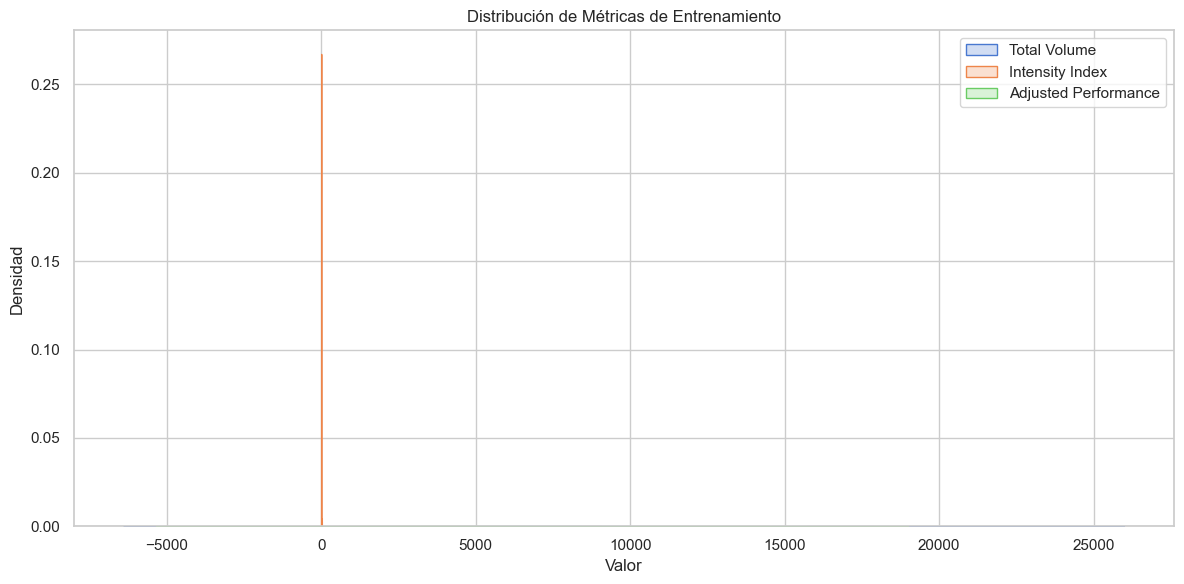

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo general
sns.set(style="whitegrid", palette="muted")

# Crear figura
plt.figure(figsize=(12, 6))
sns.kdeplot(df['total_volume'], label='Total Volume', fill=True)
sns.kdeplot(df['intensity_index'], label='Intensity Index', fill=True)
sns.kdeplot(df['adjusted_performance'], label='Adjusted Performance', fill=True)
plt.title('Distribuci√≥n de M√©tricas de Entrenamiento')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.tight_layout()
plt.show()


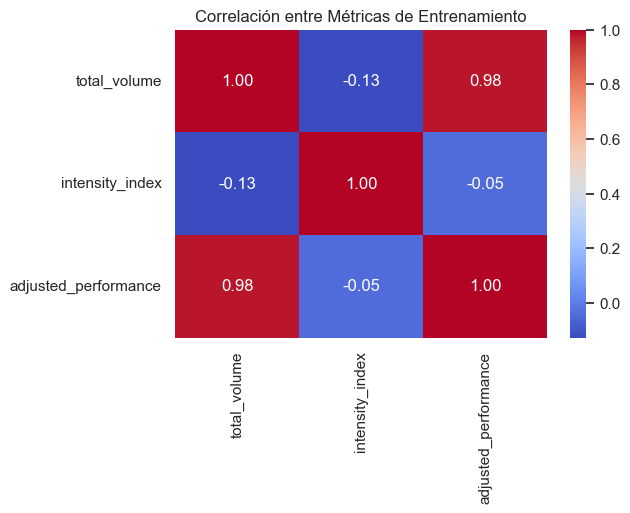

In [16]:
import numpy as np

# Seleccionar las columnas relevantes
metrics_df = df[['total_volume', 'intensity_index', 'adjusted_performance']]

# Calcular matriz de correlaci√≥n
corr = metrics_df.corr()

# Mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlaci√≥n entre M√©tricas de Entrenamiento')
plt.show()


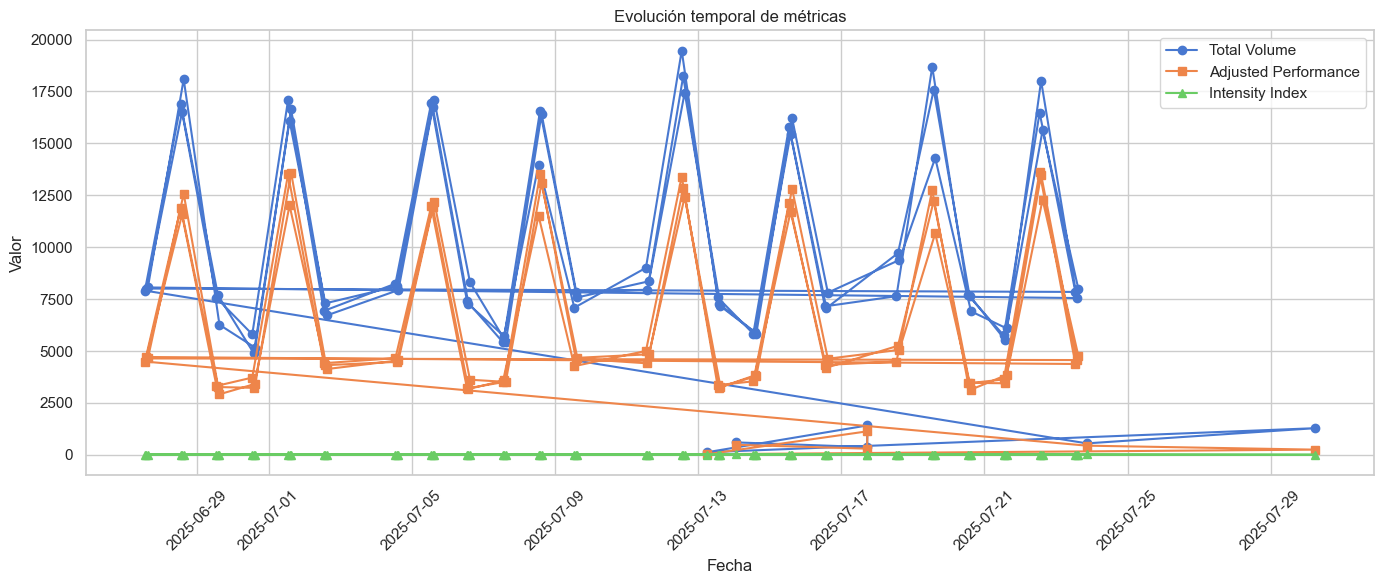

In [17]:
# Visualizaci√≥n en l√≠nea temporal
plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['total_volume'], label='Total Volume', marker='o')
plt.plot(df['date'], df['adjusted_performance'], label='Adjusted Performance', marker='s')
plt.plot(df['date'], df['intensity_index'], label='Intensity Index', marker='^')
plt.title('Evoluci√≥n temporal de m√©tricas')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:
# Calcular diferencias relativas
df['diff_adjusted_vs_volume'] = np.abs(df['adjusted_performance'] - df['total_volume']) / (df['total_volume'] + 1e-5)

# Mostrar las sesiones con m√°s diferencia
df[['date', 'total_volume', 'adjusted_performance', 'diff_adjusted_vs_volume']].sort_values(
    'diff_adjusted_vs_volume', ascending=False).head(10)


date  total_volume  adjusted_performance  \
4  2025-07-30 06:00:00+00:00        1284.0             249.35700   
3  2025-07-13 06:00:00+00:00         125.0              30.00000   
32 2025-06-29 14:00:00+00:00        7685.0            3264.67614   
14 2025-07-06 13:00:00+00:00        7400.0            3199.98294   
62 2025-07-06 15:00:00+00:00        8310.0            3617.65800   
38 2025-07-06 14:00:00+00:00        7252.5            3169.32000   
8  2025-06-29 13:00:00+00:00        7560.0            3317.37120   
20 2025-07-13 13:00:00+00:00        7590.0            3354.81300   
44 2025-07-13 14:00:00+00:00        7270.0            3234.00000   
26 2025-07-20 13:00:00+00:00        7695.0            3444.76440   

    diff_adjusted_vs_volume  
4                  0.805797  
3                  0.760000  
32                 0.575189  
14                 0.567570  
62                 0.564662  
38                 0.563003  
8                  0.561194  
20                 0.557996  
44                 0.555158  
26                 0.552337

ESTOS SON ISO PERO CON EL DATASET ENTERO, YA NO LOS USAREMOS SINO QUE UTILZIAREMOS LA NUEVA METRICA

üî¥ Sesiones an√≥malas detectadas:


date  totalDuration  avg_weight  total_volume  \
0  2025-07-14 01:06:10.842000+00:00             37       27.50         600.0   
1  2025-07-17 17:18:31.985000+00:00            345       12.00         372.0   
2  2025-07-17 17:32:39.733000+00:00            257       29.50        1416.0   
3         2025-07-13 06:00:00+00:00             25        2.50         125.0   
4         2025-07-30 06:00:00+00:00            286       21.50        1284.0   
5  2025-07-23 20:40:08.611000+00:00             26       23.00         552.0   
56        2025-06-29 15:00:00+00:00           4783       47.67        6262.5   
73        2025-07-19 15:00:00+00:00           6306       94.00       14295.0   

    anomaly  
0        -1  
1        -1  
2        -1  
3        -1  
4        -1  
5        -1  
56       -1  
73       -1

TOTAL DE SESIONES AN√ìMALAS:  8


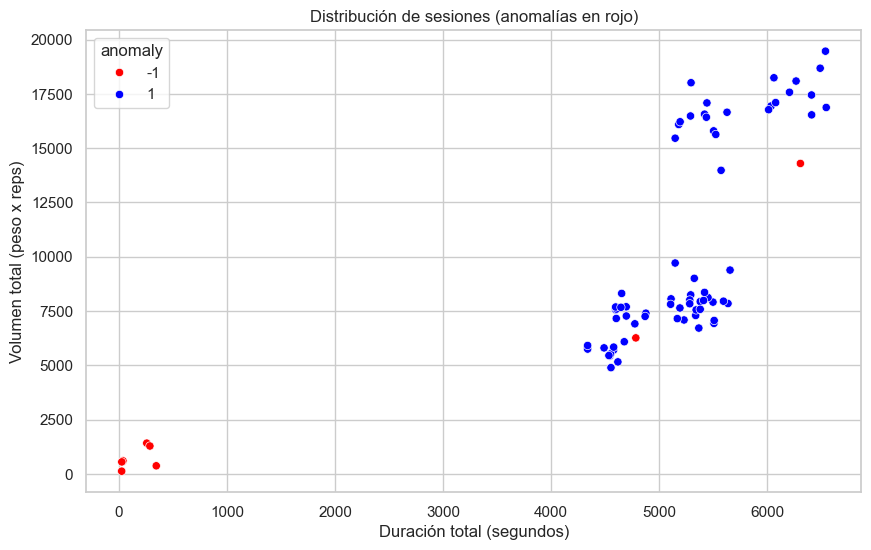

In [22]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. Seleccionamos solo columnas num√©ricas relevantes
# -------------------------------
features = [
    'totalDuration', 'totalRestTime', 'total_sets', 'avg_weight', 'std_weight',
    'avg_reps', 'std_reps', 'avg_restTime', 'total_volume', 'intensity_index',
    'rest_per_set'
]

# Incluye tambi√©n las columnas de sets por grupo muscular si quieres
muscle_columns = [col for col in df.columns if col.startswith("sets_")]
features.extend(muscle_columns)

# -------------------------------
# 2. Escalado (opcional, pero recomendado)
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# -------------------------------
# 3. Entrenamiento de Isolation Forest
# -------------------------------
model = IsolationForest(contamination=0.1, random_state=42)
df["anomaly"] = model.fit_predict(X_scaled)

# -------------------------------
# 4. Visualizaci√≥n
# -------------------------------

# Visualizamos las sesiones an√≥malas
outliers = df[df["anomaly"] == -1]
print("üî¥ Sesiones an√≥malas detectadas:")
display(outliers[["date", "totalDuration", "avg_weight", "total_volume", "anomaly"]])
print("TOTAL DE SESIONES AN√ìMALAS: ", len(outliers))

# Opcional: gr√°fico para ver la distribuci√≥n
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="totalDuration", y="total_volume",
    data=df, hue="anomaly", palette={1: "blue", -1: "red"}
)
plt.title("Distribuci√≥n de sesiones (anomal√≠as en rojo)")
plt.xlabel("Duraci√≥n total (segundos)")
plt.ylabel("Volumen total (peso x reps)")
plt.show()


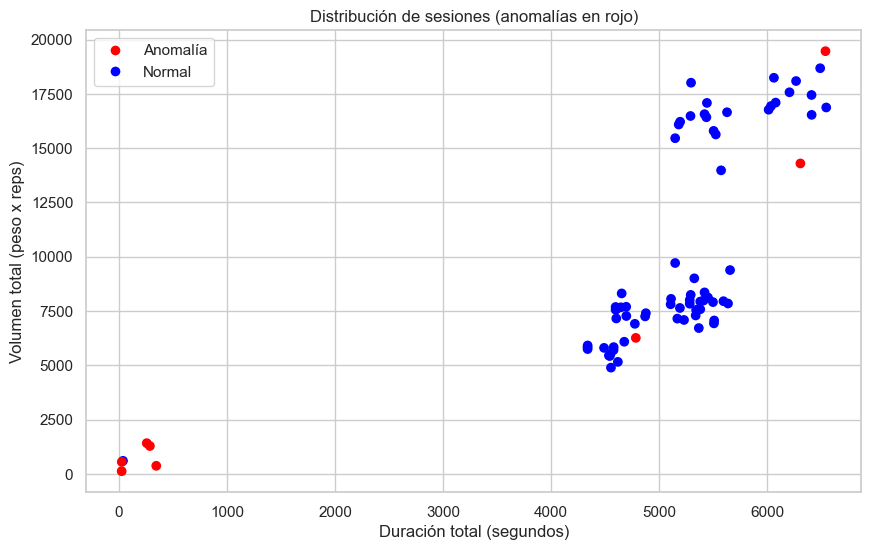

üî¥ Sesiones an√≥malas detectadas:


date  totalDuration  avg_weight  total_volume  \
1  2025-07-17 17:18:31.985000+00:00            345       12.00         372.0   
2  2025-07-17 17:32:39.733000+00:00            257       29.50        1416.0   
3         2025-07-13 06:00:00+00:00             25        2.50         125.0   
4         2025-07-30 06:00:00+00:00            286       21.50        1284.0   
5  2025-07-23 20:40:08.611000+00:00             26       23.00         552.0   
19        2025-07-12 13:00:00+00:00           6538       91.38       19465.0   
56        2025-06-29 15:00:00+00:00           4783       47.67        6262.5   
73        2025-07-19 15:00:00+00:00           6306       94.00       14295.0   

    anomaly  
1        -1  
2        -1  
3        -1  
4        -1  
5        -1  
19       -1  
56       -1  
73       -1

total de sesiones an√≥malas:  8


In [86]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Define las columnas que quieres usar como features
features = [
    'totalDuration', 'total_volume', 'avg_weight',
    'sets_pecho', 'sets_espalda', 'sets_abdomen', 'sets_hombro', 'sets_tricep', 'sets_bicep', 'sets_hombro_posterior', 'sets_hombro_lateral', 'sets_cuadricep', 'sets_isquios', 'sets_gluteo', 'sets_pantorrilla', 'sets_abdominales', 'sets_antebrazos'
]

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Modelo
model = IsolationForest(contamination=0.1, random_state=42)
df['anomaly'] = model.fit_predict(X_scaled)

# Visualizaci√≥n 2D usando duraci√≥n vs volumen
plt.figure(figsize=(10, 6))
colors = df['anomaly'].map({1: 'blue', -1: 'red'})
plt.scatter(df['totalDuration'], df['total_volume'], c=colors)
plt.xlabel("Duraci√≥n total (segundos)")
plt.ylabel("Volumen total (peso x reps)")
plt.title("Distribuci√≥n de sesiones (anomal√≠as en rojo)")
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='Anomal√≠a', markerfacecolor='red', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='Normal', markerfacecolor='blue', markersize=8)
])
plt.grid(True)
plt.show()
outliers = df[df["anomaly"] == -1]
print("üî¥ Sesiones an√≥malas detectadas:")
display(outliers[["date", "totalDuration", "avg_weight", "total_volume", "anomaly"]])
print("total de sesiones an√≥malas: ", len(outliers))


In [87]:
# Filtra las columnas que comienzan con 'sets_'
set_columns = [col for col in df.columns if col.startswith('sets_')]
print("Columnas 'sets_':")
print(set_columns)


Columnas 'sets_':
['sets_pecho', 'sets_espalda', 'sets_abdomen', 'sets_bicep', 'sets_hombro_lateral', 'sets_hombro', 'sets_tricep', 'sets_hombro_posterior', 'sets_cuadricep', 'sets_isquios', 'sets_gluteo', 'sets_pantorrilla', 'sets_abdominales', 'sets_antebrazos']


In [88]:
# Crear columna vac√≠a con valor por defecto
df['anomaly_reason'] = 'No explicada'

# Explicaci√≥n 1: Sesi√≥n muy pesada de pierna ‚Üí volumen alto y dominancia de pierna
cond_pierna_pesada = (df['anomaly'] == -1) & (
    (df['dominancia_CUADRICEP'] | df.get('dominancia_GL√öTEO', False)) &
    (df['total_volume'] > df['total_volume'].quantile(0.90))
)
df.loc[cond_pierna_pesada, 'anomaly_reason'] = 'D√≠a de pierna pesado'

# Explicaci√≥n 2: Sesi√≥n ligera de pecho u hombro ‚Üí volumen muy bajo
cond_pecho_ligero = (df['anomaly'] == -1) & (
    (df['dominancia_PECHO'] | df.get('dominancia_HOMBRO', False)) &
    (df['total_volume'] < df['total_volume'].quantile(0.10))
)
df.loc[cond_pecho_ligero, 'anomaly_reason'] = 'D√≠a ligero de torso'

# Explicaci√≥n 3: Sesi√≥n muy corta en tiempo y volumen ‚Üí probable sesi√≥n incompleta
cond_sesion_corta = (df['anomaly'] == -1) & (
    (df['totalDuration'] < 600) & (df['total_volume'] < 1000)
)
df.loc[cond_sesion_corta, 'anomaly_reason'] = 'Sesi√≥n muy corta'

# Explicaci√≥n 4: Volumen alto sin dominancia clara ‚Üí posible sobreentrenamiento o error
cond_volumen_alto_raro = (df['anomaly'] == -1) & (
    (df['total_volume'] > df['total_volume'].quantile(0.95)) &
    ~(df.filter(like="dominancia_").any(axis=1))
)
df.loc[cond_volumen_alto_raro, 'anomaly_reason'] = 'Volumen alto sin grupo dominante'


In [18]:
# Solo anomal√≠as con explicaci√≥n
df_explicadas = df[df['anomaly_reason'] != 'No explicada']

# Solo anomal√≠as sin explicaci√≥n
df_no_explicadas = df[df['anomaly_reason'] == 'No explicada']

# Vista r√°pida
print("‚úîÔ∏è Anomal√≠as explicadas:", len(df_explicadas))
print("‚ùå Anomal√≠as sin explicaci√≥n:", len(df_no_explicadas))

# Mostrar ejemplos
df_explicadas[['date', 'totalDuration', 'total_volume', 'anomaly_reason']].head()


‚úîÔ∏è Anomal√≠as explicadas: 3
‚ùå Anomal√≠as sin explicaci√≥n: 75


date  totalDuration  total_volume  \
1  2025-07-17 17:18:31.985000+00:00            345         372.0   
3         2025-07-13 06:00:00+00:00             25         125.0   
19        2025-07-12 13:00:00+00:00           6538       19465.0   

          anomaly_reason  
1       Sesi√≥n muy corta  
3       Sesi√≥n muy corta  
19  D√≠a de pierna pesado

02:29:10 - cmdstanpy - INFO - Chain [1] start processing
02:29:10 - cmdstanpy - INFO - Chain [1] done processing


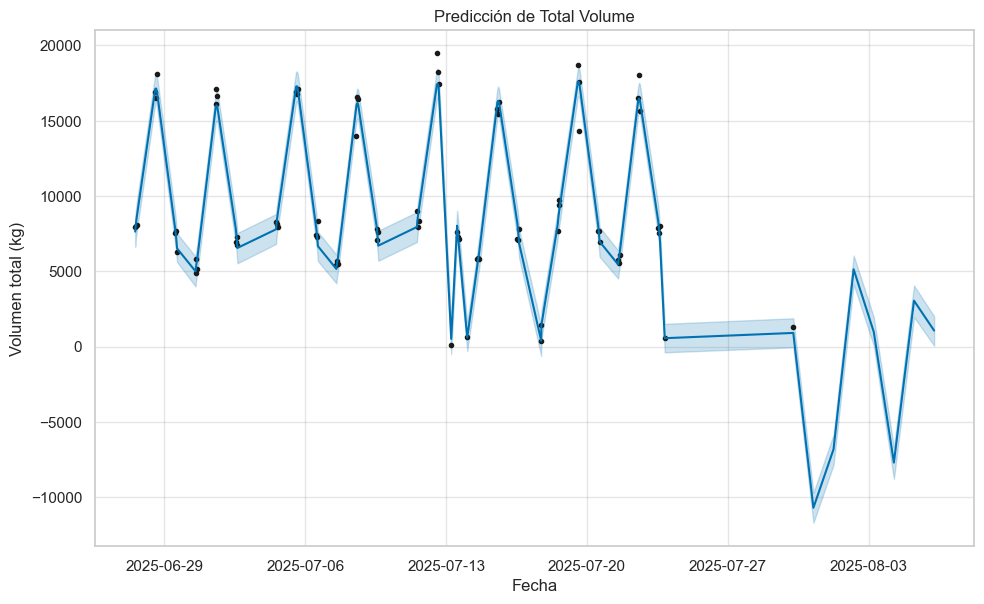

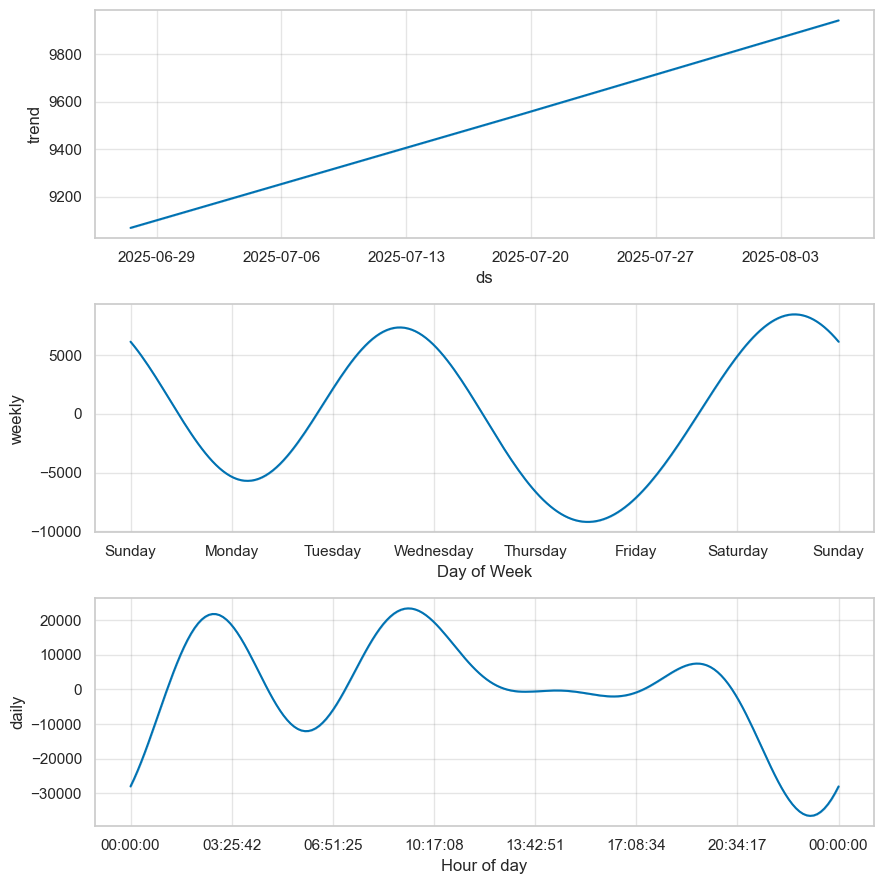

üîç Anomal√≠as detectadas por Prophet:

                    ds        y          yhat    yhat_lower    yhat_upper
16 2025-07-08 13:00:00  13977.5  16021.051987  15037.480965  16912.712125
23 2025-07-16 13:00:00   7150.0   8145.275544   7158.285122   9121.085182
73 2025-07-19 15:00:00  14295.0  17405.774845  16480.935778  18385.698708


In [89]:
# ---------------------------------------------
# 1. Imports necesarios
# ---------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# ---------------------------------------------
# 2. Preparar el DataFrame para Prophet
# ---------------------------------------------
# Asegurarse que la columna 'date' est√° como datetime
df['date'] = pd.to_datetime(df['date'])

# 1. Crear el DataFrame con Prophet
df_prophet = df[['date', 'total_volume']].rename(columns={'date': 'ds', 'total_volume': 'y'})

# 2. Eliminar zona horaria si existe (muy importante para Prophet)
df_prophet['ds'] = df_prophet['ds'].dt.tz_localize(None)


# ---------------------------------------------
# 3. Entrenar el modelo Prophet
# ---------------------------------------------
model = Prophet()
model.fit(df_prophet)

# ---------------------------------------------
# 4. Generar fechas futuras y hacer predicciones
# ---------------------------------------------
future = model.make_future_dataframe(periods=7)  # predice 7 d√≠as a futuro (puedes ajustar)
forecast = model.predict(future)

# ---------------------------------------------
# 5. Visualizar la predicci√≥n
# ---------------------------------------------
fig1 = model.plot(forecast)
plt.title("Predicci√≥n de Total Volume")
plt.xlabel("Fecha")
plt.ylabel("Volumen total (kg)")
plt.show()

# Componentes estacionales
fig2 = model.plot_components(forecast)
plt.show()

# ---------------------------------------------
# 6. Detectar anomal√≠as comparando predicci√≥n real con intervalo inferior
# ---------------------------------------------
# Unimos la predicci√≥n con los datos reales
merged = pd.merge(df_prophet, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds', how='left')

# Creamos la columna de anomal√≠a: True si el valor real cae por debajo del intervalo inferior
merged['anomaly'] = merged['y'] < merged['yhat_lower']

# ---------------------------------------------
# 7. Mostrar anomal√≠as detectadas
# ---------------------------------------------
anomalies = merged[merged['anomaly']]

print("üîç Anomal√≠as detectadas por Prophet:\n")
print(anomalies[['ds', 'y', 'yhat', 'yhat_lower', 'yhat_upper']])


ACA TERMINA E INICIA LA NUEVA METRICA

In [ ]:
import os
import joblib
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import pandas as pd
# Preparamos features
feature_cols = ['adjusted_performance', 'avg_weight', 'avg_reps', 
                'std_weight', 'rest_per_set', 'total_sets', 'totalDuration']
df_model = df[feature_cols].copy().dropna()

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_model)

# Entrenamiento
model = IsolationForest(contamination=0.1, random_state=42)
df['anomaly'] = model.fit_predict(X_scaled)
df['anomaly_label'] = df['anomaly'].map({1: 'Normal', -1: 'Anomal√≠a'})
df['risk_score'] = model.decision_function(X_scaled) * -1  # cuanto menor, m√°s an√≥malo


os.makedirs("models", exist_ok=True)

# Guardar modelo y scaler por separado
joblib.dump(scaler, 'models/scaler.pkl')
joblib.dump(model, 'models/modelo_isolation.pkl')

print("‚úÖ Modelo y scaler guardados correctamente.")

‚úÖ Modelo y scaler guardados correctamente.


In [23]:
# Visualizaci√≥n de puntos an√≥malos vs normales
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_anom,
    x='date',
    y='adjusted_performance',
    hue='anomaly_label',
    palette={'Normal': 'blue', 'Anomal√≠a': 'red'}
)
plt.title('Anomal√≠as en Adjusted Performance')
plt.xlabel('Fecha')
plt.ylabel('Performance Ajustado')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


NameError: name 'df_anom' is not defined

<Figure size 1200x600 with 0 Axes>

In [24]:
# Mostrar las sesiones an√≥malas
df_anomalias = df_anom[df_anom['anomaly'] == -1]
display(df_anomalias)
print("total de sesiones an√≥malas: ", len(df_anomalias))


NameError: name 'df_anom' is not defined

In [25]:
def clasificar_anomalia(row):
    if row['total_sets'] <= 2 and row['adjusted_performance'] < 1000:
        return 'Sesi√≥n muy corta'
    elif row['adjusted_performance'] > 13000 and row['avg_reps'] < 6:
        return 'Carga excesiva'
    elif row['rest_per_set'] > 180:
        return 'Descanso excesivo'
    elif row['std_weight'] > 25:
        return 'Pesos inestables'
    else:
        return 'Desempe√±o irregular'


In [26]:
df['anomaly_reason'] = None
df.loc[df['anomaly'] == -1, 'anomaly_reason'] = df[df['anomaly'] == -1].apply(clasificar_anomalia, axis=1)


C:\Users\Toled\AppData\Local\Temp\ipykernel_9520\269070600.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='anomaly_reason', data=anomalias, order=anomalias['anomaly_reason'].value_counts().index, palette='Reds_r')


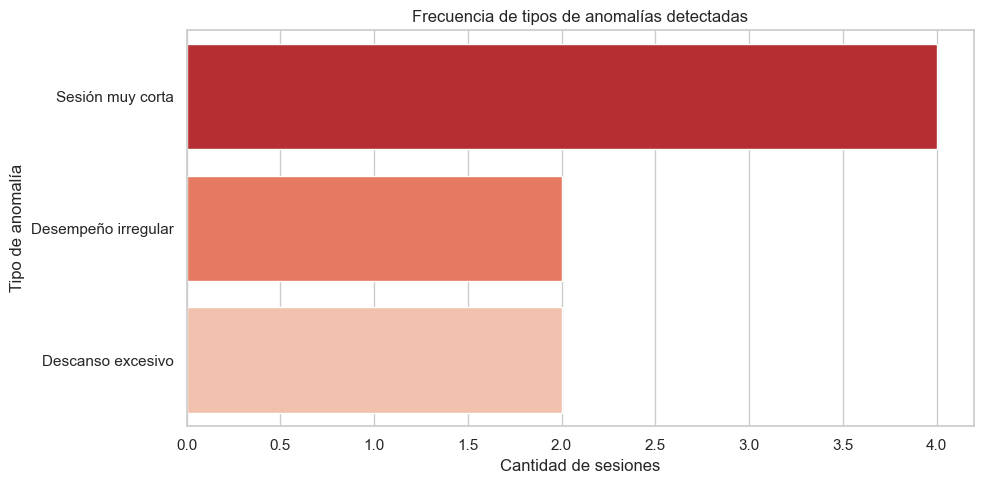

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo anomalias con causa identificada
anomalias = df[df['anomaly'] == -1]

plt.figure(figsize=(10, 5))
sns.countplot(y='anomaly_reason', data=anomalias, order=anomalias['anomaly_reason'].value_counts().index, palette='Reds_r')
plt.title('Frecuencia de tipos de anomal√≠as detectadas')
plt.xlabel('Cantidad de sesiones')
plt.ylabel('Tipo de anomal√≠a')
plt.tight_layout()
plt.show()


C:\Users\Toled\AppData\Local\Temp\ipykernel_19208\3533924043.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='anomaly_reason', y='risk_score', data=anomalias, palette='coolwarm')


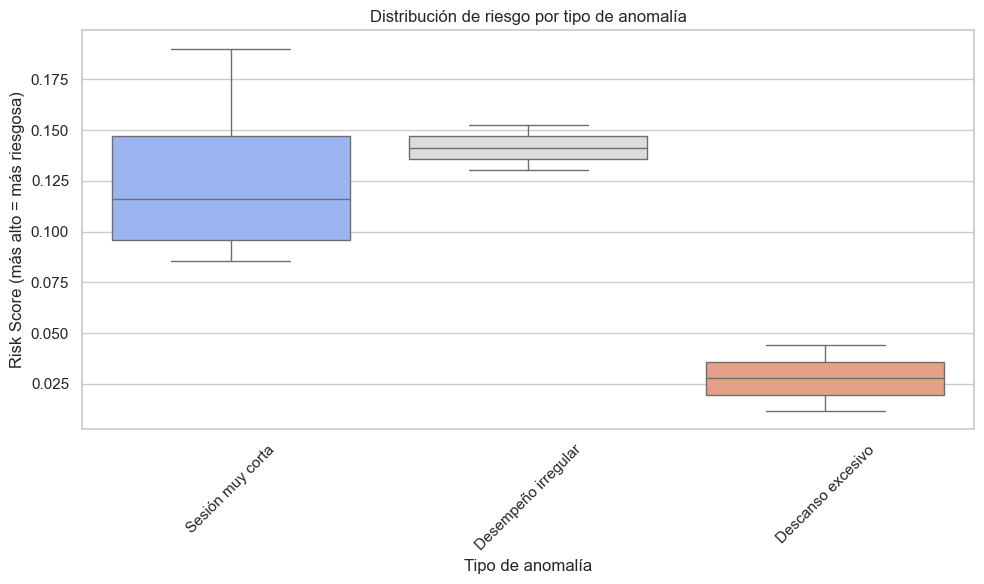

In [97]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='anomaly_reason', y='risk_score', data=anomalias, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Distribuci√≥n de riesgo por tipo de anomal√≠a')
plt.ylabel('Risk Score (m√°s alto = m√°s riesgosa)')
plt.xlabel('Tipo de anomal√≠a')
plt.tight_layout()
plt.show()


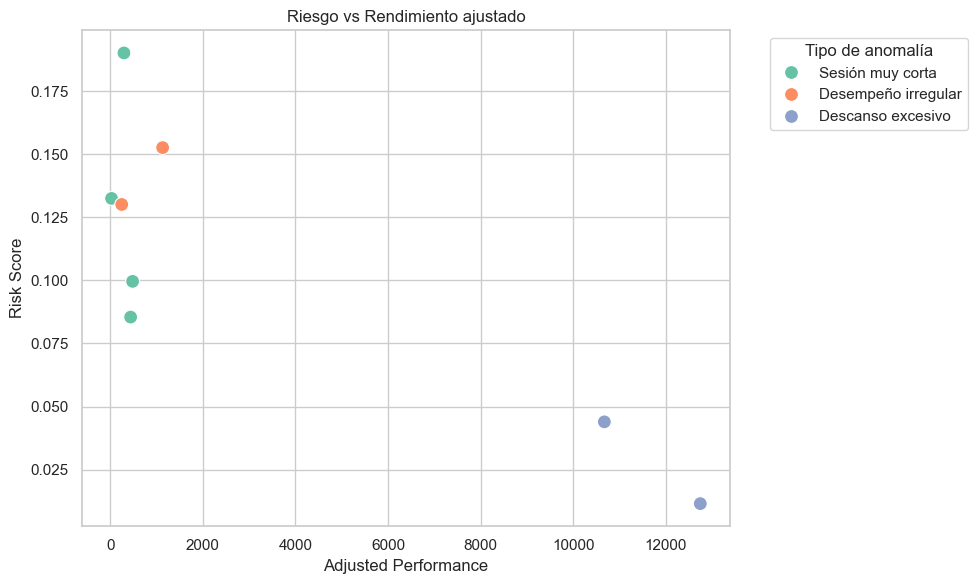

In [98]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=anomalias, x='adjusted_performance', y='risk_score', hue='anomaly_reason', palette='Set2', s=100)
plt.title('Riesgo vs Rendimiento ajustado')
plt.xlabel('Adjusted Performance')
plt.ylabel('Risk Score')
plt.legend(title='Tipo de anomal√≠a', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [77]:
df.groupby('dominant_muscle_group')['adjusted_performance'].describe()


count          mean          std        min  \
dominant_muscle_group                                                
ABDOMEN                  1.0     30.000000          NaN     30.000   
BICEP                    1.0    249.357000          NaN    249.357   
CUADRICEP               24.0  12490.505906   786.837061  10669.470   
ESPALDA                 13.0   3117.472971   620.717309   1132.800   
PECHO                   39.0   3951.884568  1155.989800    297.600   

                                25%          50%          75%          max  
dominant_muscle_group                                                       
ABDOMEN                   30.000000     30.00000     30.00000     30.00000  
BICEP                    249.357000    249.35700    249.35700    249.35700  
CUADRICEP              11961.456525  12356.34525  13162.12830  13620.38490  
ESPALDA                 3169.320000   3264.67614   3354.81300   3617.65800  
PECHO                   3607.893520   4329.42468   4629.82794   5250.51072

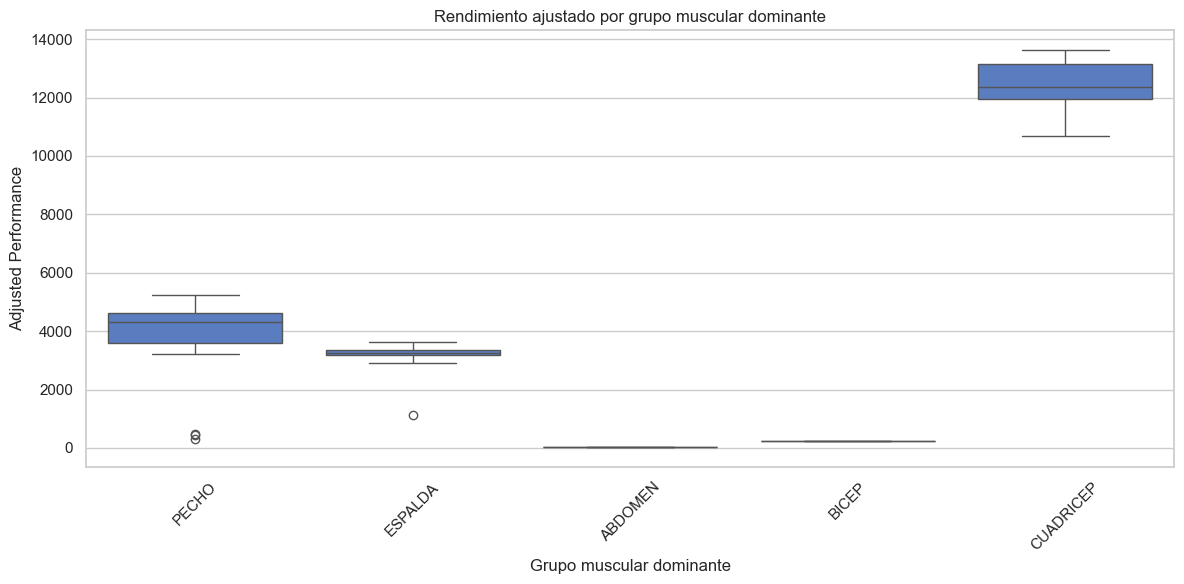

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='dominant_muscle_group', y='adjusted_performance')
plt.xticks(rotation=45)
plt.title('Rendimiento ajustado por grupo muscular dominante')
plt.ylabel('Adjusted Performance')
plt.xlabel('Grupo muscular dominante')
plt.tight_layout()
plt.show()


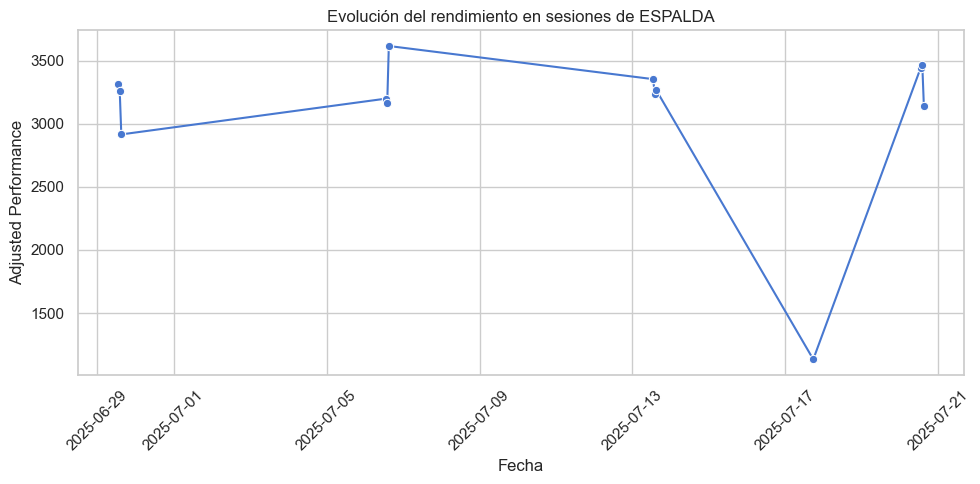

In [90]:
df_espalda = df[df['dominant_muscle_group'] == 'ESPALDA']
df_espalda = df_espalda.sort_values('date')

plt.figure(figsize=(10,5))
sns.lineplot(data=df_espalda, x='date', y='adjusted_performance', marker='o')
plt.title('Evoluci√≥n del rendimiento en sesiones de ESPALDA')
plt.ylabel('Adjusted Performance')
plt.xlabel('Fecha')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


02:23:59 - cmdstanpy - INFO - Chain [1] start processing
02:24:00 - cmdstanpy - INFO - Chain [1] done processing


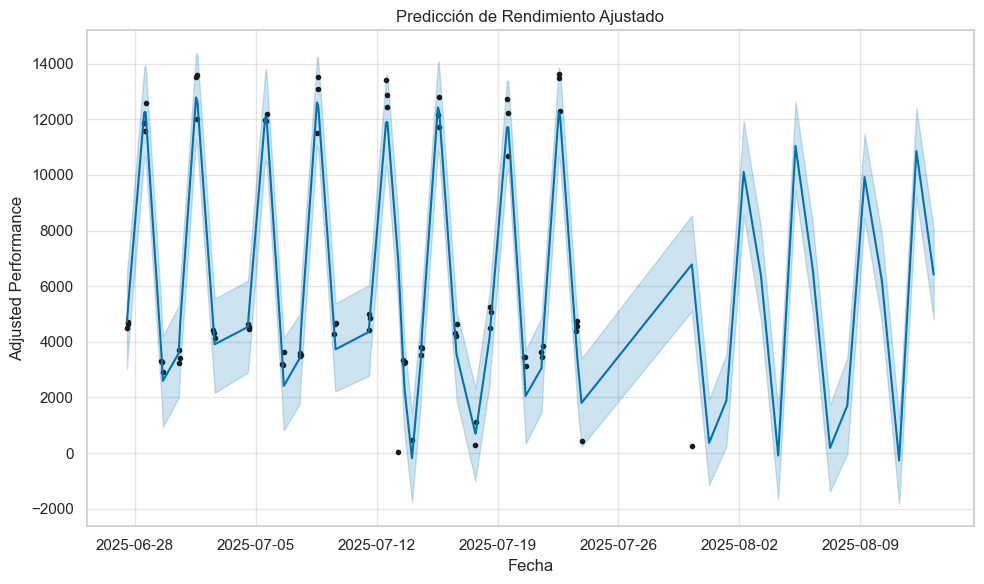

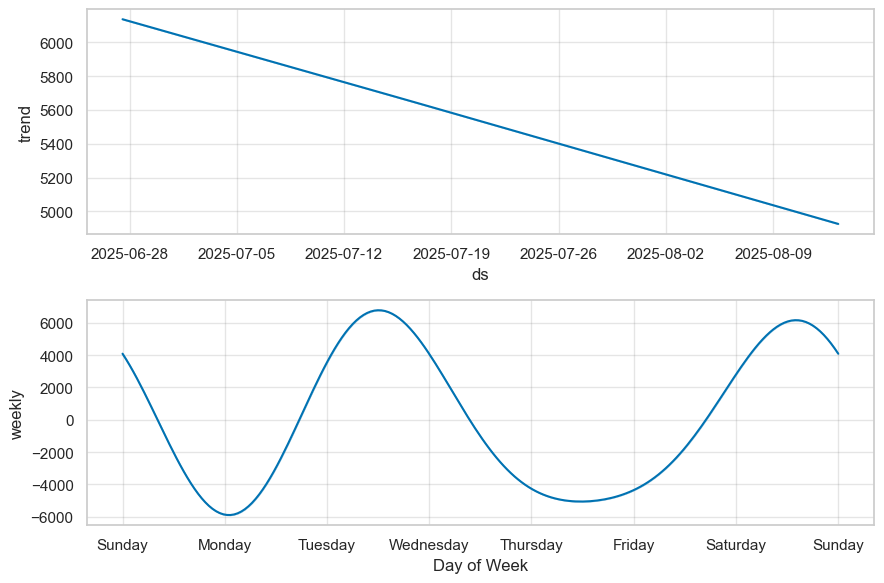

In [83]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Aseg√∫rate de tener tu DataFrame 'df' con las columnas: 'date' y 'adjusted_performance'
df_prophet = df[['date', 'adjusted_performance']].copy()
df_prophet.columns = ['ds', 'y']
df_prophet['ds'] = pd.to_datetime(df_prophet['ds']).dt.tz_localize(None)

# Inicializa y ajusta el modelo
model = Prophet(daily_seasonality=False, weekly_seasonality=True)
model.fit(df_prophet)

# Genera predicciones para los pr√≥ximos 7 d√≠as
future = model.make_future_dataframe(periods=14, freq='D')
forecast = model.predict(future)

# Gr√°fico de la predicci√≥n
fig1 = model.plot(forecast)
plt.title("Predicci√≥n de Rendimiento Ajustado")
plt.xlabel("Fecha")
plt.ylabel("Adjusted Performance")
plt.grid(True)
plt.tight_layout()
plt.show()

# Gr√°fico de componentes de la serie
fig2 = model.plot_components(forecast)
plt.tight_layout()
plt.show()
